<a href="https://colab.research.google.com/github/ojhaajy/MACHINE_LEARNING/blob/main/DATA_AUGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# get_file is a method of tensorflow
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 1s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
# now we'll read each flower photo into our numpy for this we use pathlib
import pathlib
# now convert datadirectory into pathlib
data_dir=pathlib.Path(data_dir)
data_dir
# posixpath because it is in non window(mac)

PosixPath('datasets/flower_photos')

In [6]:
#  The glob module, which is short for global, is a function that's used to search for files that match a specific file pattern or name
# now count of images that akes the conditon in glob and store it in image_count variable
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
# now use glob again to select only the roses in the list
roses=list(data_dir.glob('roses/*'))
roses[:6]

[PosixPath('datasets/flower_photos/roses/5061135742_2870a7b691_n.jpg'),
 PosixPath('datasets/flower_photos/roses/475947979_554062a608_m.jpg'),
 PosixPath('datasets/flower_photos/roses/7304710956_015b41f802_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14408977935_a397e796b8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/16157873719_bf0bdf8558_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8674140377_ae7b0be523.jpg')]

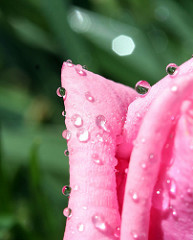

In [8]:
# PIL.Image.open() Opens and identifies the given image file.
PIL.Image.open(str(roses[1]))

In [9]:
tulips=list(data_dir.glob('tulips/*'))
tulips[:4]

[PosixPath('datasets/flower_photos/tulips/8623173256_3f0eb4c506.jpg'),
 PosixPath('datasets/flower_photos/tulips/13976206001_fd1c2cbd60.jpg'),
 PosixPath('datasets/flower_photos/tulips/12025038686_7f10811d4b_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8520488975_a50d377f91.jpg')]

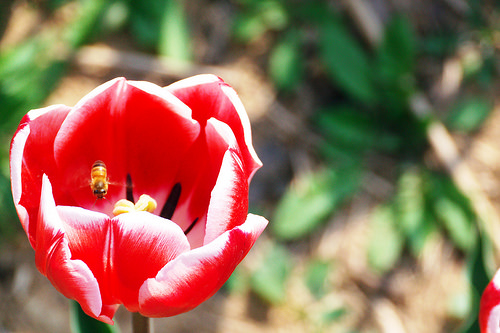

In [10]:
PIL.Image.open(str(tulips[1]))

In [11]:
# NOW WE WILL CREATE A DICTIONARY OF EACH FLOWER AND THEIR RESPECTIVE
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5061135742_2870a7b691_n.jpg'

In [14]:
# open cv convert the images into the 3d form array
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 320, 3)

In [15]:
# you can also resize it
cv2.resize(img,(180,180)).shape


(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
# now convert the list x,y above into numpy array
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
# so this 3d numpy array we have created has been you divided by 255 after which all the values in the 3d matrix will get divided by 255 and thus lie between 0 and 1
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [20]:
X_train_scaled[0]

array([[[0.39215686, 0.55686275, 0.60784314],
        [0.39607843, 0.55294118, 0.59607843],
        [0.39607843, 0.54901961, 0.58039216],
        ...,
        [0.36862745, 0.47843137, 0.48235294],
        [0.36470588, 0.47843137, 0.49803922],
        [0.38431373, 0.48627451, 0.51372549]],

       [[0.39215686, 0.55686275, 0.60392157],
        [0.39607843, 0.55294118, 0.6       ],
        [0.4       , 0.54901961, 0.59215686],
        ...,
        [0.38431373, 0.47843137, 0.49019608],
        [0.37647059, 0.4745098 , 0.49803922],
        [0.38823529, 0.47843137, 0.50980392]],

       [[0.39607843, 0.56078431, 0.6       ],
        [0.39607843, 0.55294118, 0.6       ],
        [0.39607843, 0.54117647, 0.59607843],
        ...,
        [0.39607843, 0.47843137, 0.48627451],
        [0.39607843, 0.4745098 , 0.49803922],
        [0.40392157, 0.47843137, 0.50588235]],

       ...,

       [[0.41960784, 0.38039216, 0.45490196],
        [0.41568627, 0.38823529, 0.44705882],
        [0.47843137, 0

In [23]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 50s 577ms/step - loss: 1.5113 - accuracy: 0.3725
Epoch 2/10
86/86 [==============================] - 55s 641ms/step - loss: 1.0808 - accuracy: 0.5636
Epoch 3/10
86/86 [==============================] - 55s 639ms/step - loss: 0.9095 - accuracy: 0.6497
Epoch 4/10
86/86 [==============================] - 53s 621ms/step - loss: 0.6863 - accuracy: 0.7518
Epoch 5/10
86/86 [==============================] - 49s 570ms/step - loss: 0.4717 - accuracy: 0.8368
Epoch 6/10
86/86 [==============================] - 49s 572ms/step - loss: 0.2828 - accuracy: 0.9139
Epoch 7/10
86/86 [==============================] - 49s 568ms/step - loss: 0.1931 - accuracy: 0.9404
Epoch 8/10
86/86 [==============================] - 49s 569ms/step - loss: 0.1159 - accuracy: 0.9695
Epoch 9/10
86/86 [==============================] - 49s 569ms/step - loss: 0.0464 - accuracy: 0.9898
Epoch 10/10
86/86 [==============================] - 49s 570ms/step - loss: 0.0293 - accura

In [25]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 5s 182ms/step - loss: 2.1729 - accuracy: 0.6231


[2.172934055328369, 0.6230936646461487]

In [24]:
# there is this problem of overfitting because on train dataset the accuracy came out to be 99 but when we evaluate it on the test it gives only 63.94335...
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 5s 155ms/step


array([[ 2.20825   ,  2.0761166 , -2.626208  , -0.3732584 , -1.3625981 ],
       [ 8.405319  , -4.5428643 , -7.163123  , -2.610953  ,  6.5323286 ],
       [-0.7402476 ,  1.7366818 ,  9.9697075 , -6.416541  , -4.074227  ],
       ...,
       [-0.9616693 ,  3.2900195 , -5.009984  ,  5.96618   , -1.1006436 ],
       [ 5.9573894 , -0.39334056, -5.9385433 , -5.2604713 ,  3.6691158 ],
       [-7.905291  , -6.4869366 ,  8.35331   ,  8.6703415 , -5.1237183 ]],
      dtype=float32)

In [26]:
# NOW CONVERT THE ABOVE VALUES INTO A PROBABILITY SCORE
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.50302655, 0.44076395, 0.00399956, 0.03805888, 0.01415114],
      dtype=float32)>

In [28]:
np.argmax(score)

0

In [37]:
# NOW IMPROVING ACCURACY USING DATA AGUMENTATION
data_augmentation=keras.Sequential(
    [
        layers.experimental.preprocessing.RandomRotation(0.8),
        layers.experimental.preprocessing.RandomZoom(0.6)
    ]
)

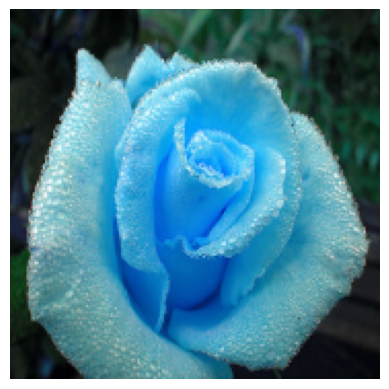

In [33]:
plt.axis('off')
plt.imshow(X[0])

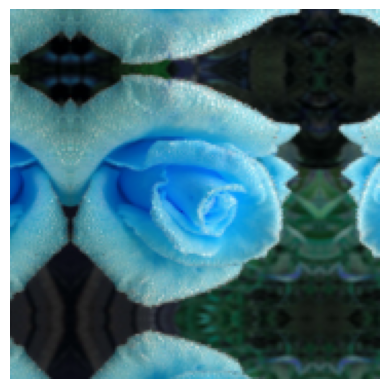

In [38]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [39]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 58s 658ms/step - loss: 1.3824 - accuracy: 0.4113
Epoch 2/10
86/86 [==============================] - 59s 688ms/step - loss: 1.1606 - accuracy: 0.5262
Epoch 3/10
86/86 [==============================] - 57s 666ms/step - loss: 1.0464 - accuracy: 0.5785
Epoch 4/10
86/86 [==============================] - 56s 654ms/step - loss: 1.0160 - accuracy: 0.5959
Epoch 5/10
86/86 [==============================] - 56s 646ms/step - loss: 0.9578 - accuracy: 0.6101
Epoch 6/10
86/86 [==============================] - 56s 652ms/step - loss: 0.9099 - accuracy: 0.6435
Epoch 7/10
86/86 [==============================] - 57s 667ms/step - loss: 0.8943 - accuracy: 0.6566
Epoch 8/10
86/86 [==============================] - 57s 656ms/step - loss: 0.8568 - accuracy: 0.6657
Epoch 9/10
86/86 [==============================] - 56s 649ms/step - loss: 0.8406 - accuracy: 0.6722
Epoch 10/10
86/86 [==============================] - 56s 650ms/step - loss: 0.8502 - accura

In [40]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 5s 156ms/step - loss: 0.7821 - accuracy: 0.6874


[0.7821462750434875, 0.687363862991333]

In [ ]:
# ITS IS CLEARLY VISIBLE THAT BY USING DATA AUGMEMENTATION AND THE DROP OUT LAYER THE ACCURACY HAS BEEN INCREASED TO 68